In [1]:
# /usr/bin/env python3
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import jieba
from collections import Counter

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.head()
# df_test.head()

id  flag  \
0  3701be69fdea4881874d073b8cc3bfdb     1   
1  967b683e4742489fb4738eb7d5f0ae4e     0   
2  f98f7ea52a9b460dbc7d32b4114b925b     1   
3  8cce3056ad9b453996f22508cf5e1d28     0   
4  0835ce6f7fcb4c7b96490b65f66a65f9     1   

                                               title  \
0  办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没...   
1                                               秋介绍~   
2                                        "精"改埃尔法提车记！   
3                                         ?里有卖？怎么联系？   
4                               “宜”与“亦”之间的区别？这辆车可以回答   

                                             content  
0  办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没...  
1                                               秋介绍~  
2   　　因为手上的两地牌关系，一直都喜欢买跑车开，觉得用了两地牌在国内开，而且完善的赛道设施，...  
3                                         ?里有卖？怎么联系？  
4                    灵山清净，拈花一笑。没想到这次的试驾地竟是如此禅意：太湖...

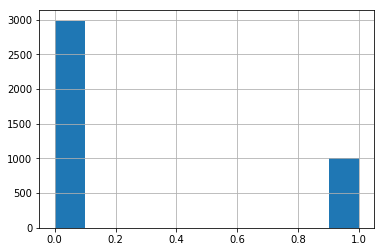

In [4]:
# 标签比例
df_train['flag'].hist()

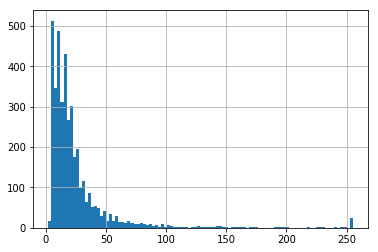

In [5]:
# 标题长度
df_train['title'].apply(lambda x: len(x)).hist(bins=100)

In [6]:
# 查看超过150个字的标题
df_title_more150 = df_train[df_train['title'].apply(lambda x: len(x)>150)]
for index, row in df_title_more150.iterrows():
    print(row['title'])
    print(row['flag'])
    print('\n')

办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没感觉值那么多，中国豪人太多。 走磨合测试定速巡航 父亲没空就带着家里的各位老板们兜风  途中也感受下老板位舒服不，辛苦大老板了，舒适版有个好处，可以不用下车就可以在车内完成换司机的任务，这个对于下雨天啥的，非常实用。  三老板，其实是最大的老板，哭起来，我都要投降 二老板  趁着假装老板的机会好好感受下车内，第2排左侧位置放个纸巾不错 中间没有扶手的好处可以放相机包还有垃圾桶，这个建议大家都要备一个，乱
1


13年半，45万公里多，保养很好的，特别是2018年将车内顶棚丶四个轮毂、方向机、避震换了后，现在高速上依然可以随便150公里多时速，有新车时候85％性能！就是有点轻微烧机油少机油，跑长途时要检查一下，娟时候少但是有时间候又没有，但是尾气不是蓝烟，发动机还没有动过，就是变速箱在35万公里时会行驶上顿挫像是入不了档修理过一次。
0


3.13号提车回泰安后发现车内太朴素～想这么调弄点亮条套餐威霆内饰亮条都塑料中网也有点失落过段时间中网行李驾还有腰线亮条作业我导航4500米算贵需要址我跟家说那些动动60001万你们哪来底气～真弄明白～ ';}oR_+='';iq_(TY_,oR_);}}function Pn_(){var Kx_=BQ_();for (TY_=0; TY_< mS_.length;RY_++){var Kh_=yO_(mS_[RY_],'_');oR_+='';}oR_+='';iq_(TY_,oR_);}else{v
1


6座夏朗，如果第三排从二排中间上车不够方便，还不如把二排边椅放倒直接进入三排更方便。 夏朗的二排边椅放倒很方便的，一只手就可以操作。 夏朗没有备胎，夏朗没有电动尾门（可以1万元左右加装），夏朗不管第二排还是第三排的空间都远远不如迈特威，迈特威二排座椅可以旋转，三排座椅可以放倒和前后移动，灵活性和空间方面，不是一个量级的。 夏朗的三排离尾门距离挺远，第三排要比奥德赛更安全。 夏朗的发动机是EA888第三代，动力和提速也比迈特威好，毕竟迈特威车子更重。 夏朗比迈特威矮，不用担心地库高度问题。
1


sampson0219 2017/01/08 09:56:02 发表在 板凳 同等 但是如果价位太高出来就可以放弃了 非要选gl8 不

In [7]:
'''
预处理掉类似这种内容：
1. ';}Ie_+='';Kc_(sy_,Ie_);}}function ht_(){var Sm_=aJ_();for (sy_=0; sy_< wF_.length;aT_++){var nv_=oX_(wF_[aT_],'_');Ie_+='';}Ie_+='';Kc_(sy_,Ie_);}else{var wF_= oX_(nK_[sy_],',');var Ie_='';for (aT_=0; aT_< wF_.length;aT_++){Ie_+=Mg_(wF_[
2. 緈冨_吶庅羙 2017/02/04 18:43:53 发表在 19楼 
'''
pat_case1 = r'[\'a-zA-Z_+=();}{,0-9<\s\[\]\.]{50,}'
pat_case2 = r'发表在.{0,5}(楼|板凳)'
instr1 = 'sampson0219 2017/01/08 09:56:02 发表在 板凳 同等 但是如果价位太高出来就可以放弃了 非要选gl8 不如选新款乞丐 低配20 高配24是有吸引力的 这还是建立在给的配置都不错上 毕竟2.5比不过2.0t 新款乞丐配置也不差 \
真皮很好解决 如果2.5减配严重 价位还不便宜 不如等等新款优惠 或者考虑别的确实，一看价格二看配置，\
离谱了就没几个人选了。等吧我也是等了好久了，新款一出来还真给吓着了，2.5的估计好不了哪去。发表在 板凳'
instr = "3.13号提车回泰安后发现车内太朴素～想这么调弄点亮条套餐威霆内饰亮条都塑料中网也有点失落过段时间中网行李驾还有腰线亮条作业我导航4500米算贵需要址我跟家说那些动动60001万你们哪来底气～真弄明白～ ';}oR_+='';iq_(TY_,oR_);}}function Pn_(){var Kx_=BQ_();for (TY_=0; TY_< mS_.length;RY_++){var Kh_=yO_(mS_[RY_],'_');oR_+='';}oR_+='';iq_(TY_,oR_);}else{v"
# pat = re.compile(pat_case2, re.M|re.I)
# obj = pat.search(instr)
# obj
# print(obj)
def remove_str(instr, pat):
    patc = re.compile(pat, re.M|re.I)
    obj = patc.search(instr)
    if obj is None:
        return instr
#     print(obj.group(0))
    pos = instr.find(obj.group(0))
    outstr = instr.replace(obj.group(0), '')
    return outstr
    
def process_case1(instr):
    return remove_str(instr, pat_case1)

def process_case2(instr):
    pat = re.compile(pat_case2, re.M|re.I)
    obj = pat.search(instr)
    if obj is None:
        return instr
    return instr[instr.find(obj.group(0))+len(obj.group(0)):]

print(process_case2(instr1))



 同等 但是如果价位太高出来就可以放弃了 非要选gl8 不如选新款乞丐 低配20 高配24是有吸引力的 这还是建立在给的配置都不错上 毕竟2.5比不过2.0t 新款乞丐配置也不差 真皮很好解决 如果2.5减配严重 价位还不便宜 不如等等新款优惠 或者考虑别的确实，一看价格二看配置，离谱了就没几个人选了。等吧我也是等了好久了，新款一出来还真给吓着了，2.5的估计好不了哪去。发表在 板凳


In [8]:
def process_str(instr):
    o_str = instr
    o_str = process_case1(o_str)
    o_str = process_case2(o_str)
    return o_str

In [9]:
process_str(instr)

'3.13号提车回泰安后发现车内太朴素～想这么调弄点亮条套餐威霆内饰亮条都塑料中网也有点失落过段时间中网行李驾还有腰线亮条作业我导航4500米算贵需要址我跟家说那些动动60001万你们哪来底气～真弄明白～'

In [10]:
# df_train['title'] = df_train['title'].apply(lambda x: process_str(x))

In [11]:
# 查看超过150个字的标题
df_title_more150 = df_train[df_train['title'].apply(lambda x: len(x)>150)]
for index, row in df_title_more150.iterrows():
    print(row['title'])
    print(row['flag'])
    print('\n')

办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没感觉值那么多，中国豪人太多。 走磨合测试定速巡航 父亲没空就带着家里的各位老板们兜风  途中也感受下老板位舒服不，辛苦大老板了，舒适版有个好处，可以不用下车就可以在车内完成换司机的任务，这个对于下雨天啥的，非常实用。  三老板，其实是最大的老板，哭起来，我都要投降 二老板  趁着假装老板的机会好好感受下车内，第2排左侧位置放个纸巾不错 中间没有扶手的好处可以放相机包还有垃圾桶，这个建议大家都要备一个，乱
1


13年半，45万公里多，保养很好的，特别是2018年将车内顶棚丶四个轮毂、方向机、避震换了后，现在高速上依然可以随便150公里多时速，有新车时候85％性能！就是有点轻微烧机油少机油，跑长途时要检查一下，娟时候少但是有时间候又没有，但是尾气不是蓝烟，发动机还没有动过，就是变速箱在35万公里时会行驶上顿挫像是入不了档修理过一次。
0


3.13号提车回泰安后发现车内太朴素～想这么调弄点亮条套餐威霆内饰亮条都塑料中网也有点失落过段时间中网行李驾还有腰线亮条作业我导航4500米算贵需要址我跟家说那些动动60001万你们哪来底气～真弄明白～ ';}oR_+='';iq_(TY_,oR_);}}function Pn_(){var Kx_=BQ_();for (TY_=0; TY_< mS_.length;RY_++){var Kh_=yO_(mS_[RY_],'_');oR_+='';}oR_+='';iq_(TY_,oR_);}else{v
1


6座夏朗，如果第三排从二排中间上车不够方便，还不如把二排边椅放倒直接进入三排更方便。 夏朗的二排边椅放倒很方便的，一只手就可以操作。 夏朗没有备胎，夏朗没有电动尾门（可以1万元左右加装），夏朗不管第二排还是第三排的空间都远远不如迈特威，迈特威二排座椅可以旋转，三排座椅可以放倒和前后移动，灵活性和空间方面，不是一个量级的。 夏朗的三排离尾门距离挺远，第三排要比奥德赛更安全。 夏朗的发动机是EA888第三代，动力和提速也比迈特威好，毕竟迈特威车子更重。 夏朗比迈特威矮，不用担心地库高度问题。
1


sampson0219 2017/01/08 09:56:02 发表在 板凳 同等 但是如果价位太高出来就可以放弃了 非要选gl8 不

In [12]:
# 查看不超过5个字的标题
df_title_more150 = df_train[df_train['title'].apply(lambda x: len(x)<15)]
for index, row in df_title_more150.iterrows():
    print(row['title'])
    print(row['flag'])
    print('\n')

秋介绍~
0


"精"改埃尔法提车记！
1


?里有卖？怎么联系？
0


05年尊壳待从生
0


10000的路过
0


14丐中丐收个原车蓝牙cd
0


17款2.0t旗舰开天窗漏风
1


17款v260四万公里
0


18731617999
0


2019款 最新款路试的消息
1


25s问题请教高人
0


28T 豪华版 发动机起停
1


28T3999款，抬显挂了
1


28T变速箱已经做的很好了
0


28T驾驶室座椅会摇动
0


28T旗舰版中门异响问题
1


28豪华电动门问题
1


3699刚提车，家用足够了
0


4s的型号是5w30
0


4S介绍白色的也是金属漆
0


730公司的车
0


9座车太少了
0


CD机这两个线是什么用
0


ESP问题请教
1


ES的都是多连杆独立悬挂
0


ES副驾电动座椅问题
0


GL8
1


GL8 Avenir避震太硬
1


gl8 es28t舒适改装
0


Gl8的碰撞成绩建议去查查
0


GL8旗舰3999感应尾门
1


gl8用户体验
1


GL8咋那么火呢
1


Gz 关注了
0


qczpgz
0


T7什么时间下线？
0


V260L车主请教帖
1


V260L腿托掉下撑不住
1


v260保养数据怎么手动归零
1


V260短轴最小转弯半径
0


v260简单说两句
1


哎呦不错呦～我的GL8
0


埃尔法，这奇葩的车！
1


埃尔法为啥一直加价还受人追捧
1


埃尔法这个价格实惠
1


爱马仕限量款奔驰助力520
0


白色威霆使用半个月个人感受
1


包头的背头稍麦也很不错
0


奔驰，且行且珍重！
1


奔驰v260航空座椅
0


奔驰V260原装座椅 全新
0


奔驰V级改装迈巴赫大包围
0


奔驰v加长版加座椅
1


奔驰商务送，奔驰乘用车不送
0


奔驰威霆用车5992公里后感
1


必须给老乡点赞
0


必须支持GL8是超级好用。
0


标点符号怪贵是把
0


别克GL8 28T音响问题
0


别克GL8 简改记 分享一下
0


别克GL8 向成功的人生致敬
1


别克GL8改装电动门西安作业
1


别克GL8中门异响解决
0


别克全新GL8 2



豪华陆上公务舱
1


好啊，麻烦把我拉进去，谢谢
0


好的 关注
0


好的 谢谢你
0


好的，感谢。
0


好的，谢谢
0


好的，谢谢，很详细
0


好的，谢谢啊
0


好的，谢谢告知
0


好的推荐你
0


好高的油耗
0


好告诉下哪吗
0


好看，我有钱了就换这个
0


好浪费。。。
0


好问题！比较一下
0


好像不用，上面写了
0


合肥，改车的时候一起改的
0


合肥什么店
0


和MPV界的老大比一比
1


和小车比，噪音还是有点大
1


河北邯郸，56万，送全车膜。
0


黑玫红四驱顶配提车
1


黑色内饰的V好看么
1


很漂亮！！
0


横置12缸的。
0


后窗那块应该是自己贴的
0


后门关上后竟然不密封
1


后排氛围灯及小电视问题
0


后视镜总成3000以上
0


琥珀金色25s尊贵版已提车
0


互相关注下
0


花45万买GL8，值么？
1


话是这样说，必须再打折啊
0


黄渤家已发，找我不用中介费
0


会变高，我178坐顶棚了
0


混动阿尔法能充电吗？
0


基本上55公里油表下去一小格
0


即使改也应该只是最高配的那个
0


己所不欲勿施于人
0


计划有变，停出
0


继续更新 品质不错的一款
0


加20的私信我。。。
0


加ai0852521
0


加捌
0


加个wei 咱一起买
0


加个尾翼就更漂亮了
0


加关注，私聊
0


加好友聊一下
0


加价太厉害
1


加你关注啦 私聊说
0


加您vx了
0


加长v的话怎么样？
1


加装头枕显示器推荐。
1


家用还是觉得米色内饰好一些
1


家用长轴距还是标准轴距！
1


假期出行 凯路威豪华定制版
0


价格多少啊？
0


价格私一个吧
0


价格咋说？
0


驾驶感受不好，底盘松垮
1


建议致电经销商详细咨询一下
0


箭头朝地面。
0


江苏的优惠情况是什么样的
0


江苏哪里？优惠这么多
0


匠心精神 改装让威霆身价百倍
0


交个威霆图片
0


节气门脏了
0


解读全新一代gl8
0


今日囍提威霆
1


今天刚问了通州的，能优惠1万
0


今天试车威霆商务版
1


今天提车了~~~


0


谢了……我还是早做好
0


谢谢 我来看看
0


谢谢！还以为黑内会耐脏一点呢
0


谢谢，到时候再问问
0


谢谢，求进群方式
0


谢谢，我去看看
0


谢谢啦！有详细店址吗？
0


谢谢啦的确是您说的那个情况
0


心里先有数
1


新GL8Avenir暖风不热
1


新GL8座椅的新设计
1


新车感觉味大
1


新车入手冒个泡
1


新车最近优惠不少呢北京
0


新疆博远商改
0


新款gl8能不能改双电门
1


新款埃尔法………
0


新款什么时候上市？
0


新年终提保姆王！
1


新入威霆，等改装OK上图
0


新提的大威开回来油耗7.7简
1


新威霆提车
1


幸福之旅！GL8带来的快乐。
0


兄弟，此话怎讲
0


兄弟，给个脚垫地址
0


兄弟，什么哥意思呢？
0


兄弟，私信个清单价格
0


兄弟，在哪问的加二十
0


兄弟给个老罗联系方式呗
0


兄弟我在台州
0


修车经验？
0


需要关注我哦
0


需要哪些我报价给你
0


需要时间，应该是先测热销车
0


悬挂改了吗？ 原车悬挂太硬了
1


悬挂真心太颠了
1


选14年的
0


寻老款尊贵14或15上牌
0


寻求沈阳专业改装厂
0


寻找组织.....
0


颜色真好看
1


要的，然后固定在顶棚
0


要二手？高顶可以私
0


要是有四驱就好了
0


要呜呜 妖灵妖四二二二领
0


钥匙开不了侧门？
1


也把我拉进去
0


也不一定。
0


也是大庆的 加个微信呗 私聊
0


也只能这样了
0


一对2.6w
0


一起去买啊
0


一起一起，争取最大优惠
0


一套下来多少钱？急
0


一样，没不拧的
0


宜家宜商
1


已关注 私聊
0


已关注，多少公里了？
0


已关注，可以私信聊一下吗？
0


已关注，麻烦给个价格呢
0


已关注，请私我
0


已关注，求pm老罗联系方式
0


已关注，求清单
0


已关注，求私信价格
0


已关注，私信VX
0


已关注，怎么联系？
0


已经关注你了
0


已经收到，封贴谢谢
0


已经私信发你了
0


已经有二十多位车友了
0


以关注求明细清单
0


意想不到的收获！
0


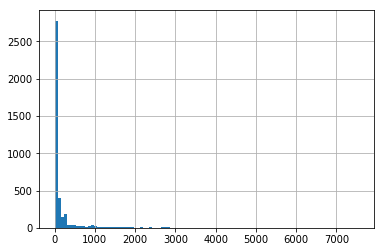

In [13]:
# 标题长度
df_train['content'].apply(lambda x: 0 if type(x) is float else len(x)).hist(bins=100)

In [14]:
# 查看超过1500个字的内容
df_title_more150 = df_train[df_train['content'].apply(lambda x: type(x) is not float and len(x)>1500)]
for index, row in df_title_more150.iterrows():
    print(row['flag'])
    print(row['title'])
    print(row['content'])
    print('\n')

1
“宜”与“亦”之间的区别？这辆车可以回答
                  灵山清净，拈花一笑。没想到这次的试驾地竟是如此禅意：太湖畔，灵山旁。闲庭信步于古朴木石的小镇，目之所及是随风摇曳的花草，暖阳斜撒，鸟语风铃，戏台钟鼓，流水观佛，竟有种穿梭至古时之唐朝，今日之京都感。细细打听，原来这里早被世界佛教论坛选定为永久会址，紧邻的灵山大佛及其周边如梵宫等地，更是集近现代佛教文化之大成，乃无数善男信女心中之圣地。拈花湾，一个纷扰世下少有的净地，如梦亦如幻，如露亦如电，应作如是观。在这个悠然恬静的胜地，追求速度／张扬个性的汽车是决然不搭的，而讲究气度和内涵的别克GL8&amp;Avenir，怕是与之最和神韵的座驾。大象无形全新一代GL8&amp;Avenir，首先在前脸上采用了全新家族式飞翼隔栅造型，加上重新设计的大灯，视觉看上去非常有精神，与上一代浑圆饱满的造型相比辨识度很高，新旧车型一目了然。得益于车身加长以及车顶金属饰条装饰，全新gl8从侧面看更修长具有质感。尾部更多向实用性倾斜，大开口的后备箱设计，非常便于旅行或搬运大件物品。内部是全新gl8的重点，一切兼顾实用与品质感：中控大面积的按键可有效避免误操作，8英寸大屏+钢琴烤漆的搭配虽然常见，但很适合gl8的稳健风格，不矫揉造作。作为国内MVP届的模版，全新GL8在本已足够舒适的老款上进行了不小的飞跃：车内座椅填充物采用了全新的材质，在腰背等需要支撑处硬，在臀腿头等需要舒适处软，在第二排的尊享座位，头枕采用人体工学u型设计，不仅可从三个方向包裹支撑，并可进行4向调节，完美承托头部。而在更高端的Avenir版上，座椅皮革全部采用了棱形纹格的真皮，触感更佳，且配上麂皮包裹的车顶，气度直逼豪华品牌MPV产品。大音希声全新一代GL8的动态表现值得一说。因为经常坐上一代GL8，对2.4L和3.0L自然吸气发动机搭配6档手自一体所带来的稳重感印象深刻。全新GL8&amp;Avenir，在底盘调教，座椅进化等因素的综合作用下，舒适度有明显提升，不必要的路面颠簸被过滤的更好。让我有一丝不解的是，在弯道上，全新gl8的第二排感受比老款侧倾更大，刚开始我怀疑是参加过各种赛道飙车活动的同行刘老师在弯道开得略猛，但在个人反复体验过后，我认为主要是悬挂改变所致，从扭力梁变为多连杆，虽然提升了舒适性和过弯的性能，但加长的车身和原本的高重心

In [15]:
# 训练集：检查是否标题是内容的一部分
cnt_total = 0
cnt_repetition = 0
for index, row in df_train.iterrows():
    cnt_total += 1
    if type(row['title']) is float or type(row['content']) is float:
        continue
    if row['title'] not in row['content']:
        cnt_repetition += 1
        print(row['flag'])
        print(row['title'])
        print(row['content'])
        print('\n')
print('{}/{} = {:.3f}'.format(cnt_repetition, cnt_total, cnt_repetition/cnt_total))

1
"精"改埃尔法提车记！
 　　因为手上的两地牌关系，一直都喜欢买跑车开，觉得用了两地牌在国内开，而且完善的赛道设施，可以在赛道上飚车确实在香港是无法想象的 。  　　因为年纪渐长，有了家庭，为了能够方便孩子家里出入方便，决定换一台7人保姆车来开，近期埃尔法在国内流行人气指数又超高，于是决定入手这辆适合家庭出行的保姆车，开来看去原厂样式配置的埃尔法就是有点老气的感觉，所以一直在看日本改装大厂对这台车的改装有哪些自己比较喜欢的，结果一看到Wald对这台车的改装后立即就吸引到我了，拿起电话打给中国总代，问问关于这台车的改装方案。   


1
“宜”与“亦”之间的区别？这辆车可以回答
                  灵山清净，拈花一笑。没想到这次的试驾地竟是如此禅意：太湖畔，灵山旁。闲庭信步于古朴木石的小镇，目之所及是随风摇曳的花草，暖阳斜撒，鸟语风铃，戏台钟鼓，流水观佛，竟有种穿梭至古时之唐朝，今日之京都感。细细打听，原来这里早被世界佛教论坛选定为永久会址，紧邻的灵山大佛及其周边如梵宫等地，更是集近现代佛教文化之大成，乃无数善男信女心中之圣地。拈花湾，一个纷扰世下少有的净地，如梦亦如幻，如露亦如电，应作如是观。在这个悠然恬静的胜地，追求速度／张扬个性的汽车是决然不搭的，而讲究气度和内涵的别克GL8&amp;Avenir，怕是与之最和神韵的座驾。大象无形全新一代GL8&amp;Avenir，首先在前脸上采用了全新家族式飞翼隔栅造型，加上重新设计的大灯，视觉看上去非常有精神，与上一代浑圆饱满的造型相比辨识度很高，新旧车型一目了然。得益于车身加长以及车顶金属饰条装饰，全新gl8从侧面看更修长具有质感。尾部更多向实用性倾斜，大开口的后备箱设计，非常便于旅行或搬运大件物品。内部是全新gl8的重点，一切兼顾实用与品质感：中控大面积的按键可有效避免误操作，8英寸大屏+钢琴烤漆的搭配虽然常见，但很适合gl8的稳健风格，不矫揉造作。作为国内MVP届的模版，全新GL8在本已足够舒适的老款上进行了不小的飞跃：车内座椅填充物采用了全新的材质，在腰背等需要支撑处硬，在臀腿头等需要舒适处软，在第二排的尊享座位，头枕采用人体工学u型设计，不仅可从三个方向包裹支撑，并可进行4向调节，完美承托头部。而在更高端的Avenir版上，座椅皮革全部采用了棱形纹格的真皮，触感更佳，且配上麂皮包裹的车顶，气

福奔最脑残的设计
　　所谓级航空座椅调节按键还有前后移动把手样位置奔驰级工程师怎么解释市场主流MPV就没这么设计包括丰田艾尔法众迈特威别克GL8本田艾力绅奥德赛细心朋友可以关注


1
福利：V260 2018款 即将上市
　　打算今年提一辆 V260 作为商务和家庭用车，年前在店里看了实车，发现各个功能不比阿尔法差多少，豪华感也不错，性价比高，也看过好多商务，比如1阿尔法永久性加价   2 GL8 单侧电动门 太low   3.看到广汽传祺GM8，确实综合比太高了，就是牌子不过硬，内饰只有米色一种，最终还是决定V260 　　给即将要提V260 的老板们福利，打探到福建奔驰内部消息，有所改动 　　1.2018款将于5月份上市 　　2.发动机变更 　　3.后玻璃可以单独打开  


0
改过轮毂的指教一下
　　请问威霆改20寸前后配的轮毂可以吗？能装的上吗？米其林245/40/20舒适性怎么样


0
改装大神求指点
                                      想入手esgl8纠结2899还是3699求指点2899升级原厂中央扶手，电动真皮座椅，座椅加热，电动中门尾门，原厂led大灯大约&#xec6c;&#xed39;钱                      


0
改装就是一场艳遇，艳的是车遇的是人
　　大家好，我提车有半个多月了，之前在网上找的这家专业改装GL8的店家，在网上打电话约好之后他们把货发过来之后，不到两天就过来了，改装师傅的干活效率不错的，两天就改装完工了， 　　2899金色 　　下面是我改的项目 　　1，扶手箱 　　2，道可视360全景夜市的 　　3，柚木地板 　　4，不锈钢踏板带灯 　　5，航空座椅加前排包皮 　　6，鹿皮绒窗帘 　　7，电视（大篷车） 　　8，小桌板 　　9，九宫格 　　10，星空顶  　　美好的一天从升级车子开始   　　刚出去一会儿回来就已经拆成这样了  　　拆完之后就这样了，薄薄的一成铁皮，建议你们做一成隔音，  　　扶手箱装好了，还带一个220v的电源，可以充手机电脑什么的，还有师傅说不可以用太大电流的东西   　　上面还有一个储蓄的地方，空间挺大，这样杂七杂八的小东西不愁没地放了  　　这是360全景的前视，在中网的中间   　　这是后视，专用的，装在左边，师傅说装在左边比较剧中，视

1
试驾别克全新一代GL8&GL8 Avenir
　　全新一代GL8上的这款2。全新一代GL8全系标配新一代Otar安吉星全时在线助理，提供包括碰撞自动求助、紧急救援服务、实时车况检测、超级管家等22项主要服务，并提供4G。Avenir与普通全新一代GL8在外观上有明显不同。  　　坐在新车的第二排，全新开发的贵宾级座椅能提供堪比头等舱的乘坐体验。电动调节椅背角度、四向腰托、独立电动腿托、座椅加热/通风/按摩功能、扶手调节及侧翼六向可调航空头枕……可谓极其豪华。为第二排座椅专门设计的USB充电接口、手机放置槽等人性化便利设计，媲美飞机头等舱名不虚传，“坐享其程”实至名归。 　　在行车过程中，全新一代GL8在底盘滤振方面的优秀表现令人印象深刻，不仅对高频振动与琐碎颠簸的隔绝到位，同时得益于较长的悬架行程，对长波起伏的抑制也毫不拖泥带水。相比上一代GL8车型也有显著提升。 　　澎湃动力：操控升级，宜商宜家的新选择 　　实际驾驶中，全新一代GL8的方向盘给人的第一印象是：细腻，方向盘反馈被工程师调节的很有高级感。2.0T涡轮增压发动机动力输出非常平顺。全新一代GL8上的这款2.0T发动机经过工程师的特别调校，其标定更偏向于V6发动机平顺动力输出的特性；但是当你需要发动机给予车辆强劲的动力时，它的潜力也十分深厚，即便是中高速超车，只要一脚油门，变速箱立刻降挡，超车动作干脆利落，宽泛的峰值扭矩输出能够令驾驶者充满信心，仿佛开的是一台SUV。 　　全新外观内饰：MPV少有的豪华与精致 　　全新一代GL8的外观相比老款堪称焕然一新。新的别克家族化设计语言完全摆脱了老款车型圆润的感觉，整体看上去更加优雅，隐藏式D柱设计所形成的悬浮式车顶不仅提升了新车的辨识度，也提升了整车的豪华观感。内饰大面积采用自然触感的软包覆材质，工艺细节精湛。 　　作为引领大型豪华MPV市场的标杆产品，丰富的科技与豪华配置必不可少。全新一代GL8全系标配新一代OnStar安吉星全时在线助理，提供包括碰撞自动求助、紧急救援服务、实时车况检测、超级管家等22项主要服务，并提供4G LTEWi-Fi热点功能。新车还升级配备了支持手机映射和自然语音识别功能的别克新一代智慧互联系统，灵活适配移动互联时代的用车需求。 　　GL8 Avenir：豪华尊贵+定制化专属服务 　　作为别克旗下Avenir高端子品牌的首款车型，G

0
25s已提车，后续发作业！
　　先上两张  　　那么经典的红白蓝   　　这个颜色，真是随天气，阴天看不出金来  


0
25S尊贵版优惠2万落地29万多可以入手吗？
　　2017款25s尊贵版可以入手吗这个价


1
28.99万提车、改装作业！
                  提车已快两周了，之前也发了些照片。这次从新整理一下，大家一起分享。顺便也说说使用感受。提车两周，其实没怎么开，高速没有上过，最快就是在城市环路跑了跑，也能跑到80-90这样。首先说说动力：我个人认为还可以，毕竟这么大的车，提速还是有感觉的，不能和2.0T的三系相比。但是好过很多SUV的感受。后面我会说下和我之前的新胜达2.0T的对比。再说下舒适程度：从老款的陆尊、胖头鱼都有开过，也经常开着跑长途，过去的两款可以说，坐车的人很舒服，开车的人很累，基本没有任何驾驶感受，舒适程度上也没有照顾到驾驶员的感受。17款28T的改变还是非常大的，座椅的舒适度很好，后减震换成独立悬挂后，虑震做的很好，最主要的一点是驾驶员的感受改变了很多，车子的路感好了很多，方向的指向很好，力度适中，开起来很轻松。。驾驶员座椅的舒适度也很好，虽然还没有开着它跑长途，相信跑长途驾驶员不会像前两款GL8那么累了。简单说下选车经历，其他车型就不提了，什么奥德赛、艾力绅从来就没有考虑过，就是一个字，小。至于更高级别的塞纳，就不多说了，一个字，贵。所以直接主题，选择性就放在了17款28T上了。买商务的主要原因就是家里生老二，人多坐不下啊。。，买这个车之前先卖掉了开了3年的现代全新胜达2.0T四驱顶配，感觉有些鸡肋了。车也不小，但是还是不够坐这两款车倒是可以给大家说说感受，有一些对比。2.0T的胜达245匹，350牛米，爱信6速变速箱，从动力参数来看，很不错，但是实际驾驶感受没有28T的GL8提速舒畅，变速箱没有别克的感受度好，这个新GL8的变速箱可以说非常好，顿挫感可以说几乎没有。比起现代的要好很多，提速时的发动机噪音也小很多，我当时的新胜达的发动机声音比较大，尤其在急加速的时候。总体感受，GL8的28T发动机和变速箱配合很好，逻辑性很合理。油耗：简单说下吧，因为目前为止才开了100多公里，也基本市区快速路。目前显示14个左右的油，凭借经验，我认为实际油耗在12个左右。我之前的新胜达市区油耗也在12-13之间，高速10个油


1
奔驰威霆内饰改装看着家店是如何改装的
　　对威霆的内饰一直不满意想改一下风格样式，与朋友说了一下，之后朋友推荐我来格林瑞雅改装店说这家店改装的挺好的，抱着怀疑的心态来了这家店，与工作人员说想改什么样的同事让工作人员把之前改装的案例拿出来我看看，在翻看他们的成功案例看到了一款我喜欢的内饰，但是车型不一样，问工作人员可以改吗 工作人员拿着案例去找改装师傅去看看能不能改，改装师傅看了之后说没问题能改而且还能改装的比这个还要好，听了之后感觉挺靠谱的这家店，决定试试怎么样，话不多说了来看一下改装的效果图吧！     


1
奔驰威霆商务车改装六座版
　　新款奔驰威霆商务车，高顶外观设计，突显威霆的豪华大气，运动型轿车前脸，让新威霆有别于那些呆板竞品车型，精巧的流线型车身线条设计，5370mm;1928mm;2100mm车身尺寸，保证了内部开阔的乘坐空间。  　　2017款奔驰新威霆改装版，低调中的简单大气，英朗车身勾勒出精英锋芒，简练的前脸设计透漏大家风范，流线型高顶设计令宾客倍感神圣。拉开电动舱门。全车豪华游艇级内部装饰，高级实木迎宾踏板，尽显尊贵。座椅电动一键式展开记忆功能调节加反向座椅（带加热功能）附有加热，通风，电动控制！优雅变型，多项气动按摩功能缓解工作疲劳。  　　这款新威霆房车并没有采用全隔断式设计，这样更加方便了前后座的信息交流。在车内，新威霆加装了折叠式4G网络电视，信息时代怎么可以没有无线，新威霆也同样的加装了车载WIFI方便车主手机、手提上网浏览或工作、电视在线观影点播，面面俱到。  　　内饰风格依旧保持奔驰商务车的豪华质地，座椅均有进口澳洲小牛皮包裹，全车豪华柚木与绒丝窗帘充分保护隐私，进口意大利阿尔坎塔拉鹿皮绒顶尽显品质。两侧隐藏小桌板，隐藏式电动咖啡机，隐藏式秘书座椅。后排二座配置了两个超舒适宽大的真皮航空座椅，依照人体工学全新设计，多向舒适性调节，为您保证最舒适坐姿，搭配贴心设计的可调节式头枕，全方位疏解旅途劳顿。同时32寸高清晰液晶电视机可实现电动升降，音响设备则是来自日本的建武5.1声道音响，在旅途之余可为您带来视觉与听觉的盛宴！  　　奔驰新威霆商务车配套2.0T奔驰独有的M274节能发动机，7速手自一体变速箱，动力强劲油耗较低，同时配有可调悬挂阻尼和自动启停系统，让您在驾驶过程中得心应手，毫不费力！视线转向中控台，超大尺寸的液晶触

0
关于2017款别克GL8 2.5S的机油问题
                                      &#xed14;家&#xed4a;，本人5月1日提&#xed76;台2017款别克GL82.5S，因为&#xec62;家里自己用，想在4s店免费保养以后就自己找修理厂保养，机油盖上显示的&#xec62;0W20，提车做车检的时候问&#xed76;工作人员N次，工作人员就&#xec62;不回答这问题，看到维修车间上放着5w30的，不知道&#xec62;给哪个车用的。各路&#xed14;神有谁在开着这款车吗？有没有什么建议？                      


0
关于ES的保养
　　各位大哥，保养用哪个牌子的机油比较适合这个车？


1
关于GL828T双侧们异响问题
                  车是16年底提的第一批新车，买回来后陆陆续续暴露了不少问题1：刹车的时候有金属撞击声，偶尔有，目前没有刹车失灵的状况2：车载蓝牙系统和中控屏系统都出现不同的故障，有时候蓝牙连不上，有时候得重新匹配，中控屏幕黑屏，死机3：最受不了的双侧中门异响，调试过也没解决，我想问下大家有没有把这个异响解决了的大神，求个方法4：HUD抬头显示参数经常自己变化5：装配工艺太次，副驾驶位前方大台下边的仿皮一用力就能拉下来，大家千万注意，别用脚蹬目前我发现的问题也就这么多，真不希望再有其他问


1
关于V260空调的问题
　　我的车连续两次长途的时候出现问题了。再高速行驶超过4小时左右的时间，冷风风量就会变的很小（比微风还小）然后停靠服务区熄火10分钟后，再上车打火，问题就消失了。请问大家，你们有遇到过此事吗？是怎么个情况呢？我让4S检查多次，也无法给出答案


1
关于V级原厂悬挂和空气悬挂请教
　　各位车友好。小弟也是V车主，最近感觉悬挂偏硬，想换空气悬挂，但是不知道空气悬挂好不好，或者说适不适合MPV？我怕会破坏原厂的支撑性。我很多东西倾向于原厂，不知道有人能理解我吗，哈哈。在这里就想问问改过空气悬挂的车主，这个用下来，感觉如何？和原厂比的话


0
关于奔驰V的原厂轮毂和轮胎尺寸
　　原厂轮毂是18寸 J7.5 配的245 45 r18 不是应该配225或者235的胎宽吗？


1
关于侧滑门问题
　　6月份的时候买了辆28t的旗舰版，在上个月

1
苦等3个月，总算提车GL8Avenir
                  年初就本打算买辆好点的MPV,看过埃尔法，加价30万，凡加价购车一律不买。自己心里想，如有辆车造的和埃尔法内饰相差不多的，果断买后者。结果意外得知GL8出新款，果断搜索，Avenir版本没有让我失望。虽然日本埃尔法我也使用过，就单单加价行为不能接受。还比日本卖的超贵。冲动购买这版本理由，BOSE12个喇叭，灰白色麂绒皮，氛围灯18色，座椅柔软。有这些不比埃尔法差吧。缺点，单侧手动门，起步太肉。触摸屏不灵活。其他暂未发现。订车时间3月初，车生产4月，提车5月中旬。不加价，有优惠。嘿嘿，找经理出来。出门抽支烟搞定。大爱12个喇叭3公里&nbsp;非常不错。车味道太大了。这照片被我吸引了。                                                 


1
来来来 涨一波姿势了 进口V原来长这样
                  相较于国内的奔驰V级曜石黑、皓雪白、太空银三种略显常态化的配色，我们眼前这款奔驰V250的着色上似乎有点儿不走寻常路的意味，渐变式的金色车身着色，新意款款倒也不会显得浮夸，搭配新一代轿车化设计的前脸以及俏皮的车身曲线，在车水马龙的街头游走，绝对能保证相当的回头率。进口版本的奔驰V250驾驶舱的基本格局与国内版本在原型车方面也基本是相差无几，新一代V级标志性的COMMAND控制系统、8.4寸悬浮式液晶触控大屏依然是最抢眼的存在，集多媒体、蓝牙、语音智能调控于一体，同时全新设计的三幅式方向盘也为丰富驾驶乐趣保留了手动模式实用的换挡拨片；具体到这款奔驰V250改装房车与原型车一个大的差异是，无论是皮革原材料的选择、缝线的精细程度，以及像中间垂瀑式的中控装饰条，都属于提升驾驶感受与视觉享受的豪华舒适性配备，此外车载冰箱设计，在炎炎夏日 想必也格外受用。双开电动侧滑门设计，也已经成为了奔驰V级改装房车的一项固有属性，更高的逼格，更从容的上下车姿态；与国内版本的奔驰V级房车一个明显的差异是福建奔驰V级房车大多为7座式格局，前后舱隔屏上主要是全隔或是无隔两款，而进口奔驰V250改装房车目前市面上基本是全隔断隐藏6座式格局，对于隐藏6座这个概念，就是常规吧台，需要时可拓展为对坐式秘书座椅，更顾全后舱航空级首长席的乘坐体验，也是当下房车中时兴的一

                  全新一代GL8Avenir内饰车顶是麂皮绒面材质！而且还有18色车顶氛围灯！大大提高了豪华感！脚垫也是专属长绒脚垫！非常舒服！但遇到下雨天脚垫脏了应该比较难清洗！                                                 


0
全新一代GL8 Avenir诠释细节之美与豪华格调
　　上汽通用汽车别克品牌宣布， 别克Avenir子品牌首款车型———GL8Avenir， 随着11月5日全新一代GL8发布已经正式上市，售价44.99万元。上汽通用汽车别克市场营销部部长包晔表示，“别克Avenir， 是别克品牌对超越经典的美学理念与以客为尊的 别克关怀 的完美演绎。 全新一代GL8 Avenir将为用户提供更精致、 个性化的产品和更尊贵的专属服务体验，满足他们不断升级的消费需求。 ”全新一代GL8 Avenir不仅外观内饰彰显与众不同的尊贵品位，同时更享有专属的包含6年或12万公里免费保养在内的“别客汇Avenir黑卡”私人定制化服务。 导演张艺作为别克全新一代GL8 Avenir首位车主出席了发布会。 　　作为别克Avenir高端子品牌的首款产品，全新一代GL8 Avenir诠释了前瞻时代的设计理念与超越时光的经典之美，同时也为别克客户提供更精致、个性化的产品和更尊贵的服务体验。Avenir车型前格栅设计灵感来自于别克家族徽标中世纪贵族的锁子甲，以金属编织美学技法结合参数化设计技术，对每一个菱形编织不断手工调整，使其在形变与光变上形成优雅过渡，折射出匠人之心。 寓意祥瑞的专属伯爵紫车身颜色， 配合18吋全新皇冠型大尺寸轮毂，彰显GL8 Avenir车型的尊贵身份与优雅魅力。 　　同样，作为Avenir车型内饰的点睛之笔，立体流动的菱形编织符号也被运用到了座椅、中控面板和车门饰板处，以不断叠加排列的造型布局、通过参数化结构美学予以呈现， 每一个角度的转折、每一处缝线的走向， 无不通过人工亲历亲为的把握，经过无数次的细微调整得以最终定型。 Avenir的车顶顶衬、 遮阳板以及 门柱均以创新麂皮绒面料包覆，不仅拥有出色的质感，同时也将别克一贯高水准的豪华静谧品质提升到了全新的高度。Avenir的地毯含绒量高达74Oz，已经达到居家级的地毯品质，加上18种颜色可调车顶氛围灯，营造出心境与环境的默契，彰显

嗡嗡异响……
　　08年12月，陆尊3.0 　　车子启动后一直有嗡嗡的响声感觉像助力泵响，又感觉是变速箱响，挂倒挡就没有了，求助有知道的车友吗？  


0
我的别克GL8，手残党拍照，勿怪！
 　　今天要上传的是我的GL8改装图，至于改装的原因还得从我买这辆别克GL8说起。 　　说起别克GL8，第一时间想到的就是他超大宽敞的车内空间，但这宽阔的空间与之带来的是内饰的做工不够细致，因为当时买GL8的时候，目的就是为了商务家庭两用的，不说平时带家人出去旅游，不舒服的内饰带来的麻烦外，就是平时工作的时候，接待客户的话，没有一个良好的车内空间，对于工作交流来说也是极为不方便的，在多方的权衡之下，最终决定将他进行下改装，不说改装的多么豪华吧，至少稍微改的舒适大方一点，这样不管是家用还是商务，用起来也能更舒心顺手一下。 　　下面直接放图片，手残党，图片就将就着看一下吧。     　　首先进行改动的就是电动中门了，不管怎么说 电动始终比手动快捷多了     　　第二个是改了了下电动尾门，双干上电吸，智能防夹的   　　换了一个原厂的扶手箱，因为平时发票什么的也比较多，他这个里面空间很大，可以按照自己的想法划分储物空间，再者里面有一个充电的地方，用起来还是比较方便的    　　前排和第三排包了下座椅真皮   　　装了一个九宫格顶灯，用的是LED的节能灯，主要是为了晚上照明方便   　　装上吸顶电视的原因则完全是为了小朋友，如果平常一家子出去玩的话，这个也能让小孩子在车上安静的待着，不吵闹        　　换了一个360全景，全景的辅助，毕竟不管怎么样，出去旅游还是接待客户，安全最重要么    　　好了，感谢各位能看到这里，我的大片分享就到这里啦，改装之前看了许多大神车友们的改装教程，所以学到了很多，感谢感谢，也感谢我的改装师傅敬业的改装，文采和专业都有限，就是分享下，如果有错误和瑕疵之处，还请改正 ！  


1
我的老威霆
　　买威霆很久了 　　关注威霆论坛也很久了 　　喜欢它的标志和空间 　　4S店有现车，加价送配置，没有犹豫，直接就提了 　　如我所愿，威霆配送屏幕、板贴膜 　　现在改的挺满意。  　　正面照片  　　左侧照片  　　右侧照片  　　背面照片  　　后备箱是电动的，比较好用  　　后面门开的时候要注意，预留的空间不足会碰上门，门比较长   　　主驾驶打开拍照

知道商务版2排中间为什么这么窄了
　　2座椅边留空间看图  


0
知欲圆，行欲方；别克GL8Avenir诠释大器之才
　　Avenir车身独有的伯爵紫配以前脸的专属立体网状格栅，充满科技元素设计的展翼型全LED前大灯与尾灯，为整车的时尚感增色不少；短前悬、长后悬的车身规划，在保证轴距不变的情况下，使车内空间得到进一步拓展；俯冲式的双腰线配合悬浮式D柱设计，令视觉效果更加灵动、自然。车内的专属立体菱格纹内饰面板，座椅独立自动空调+加热+按摩，畅享随心的电源接口装配、柔顺触感的麂皮车衬包裹、精心调配的BOSS音响以及18色可调式内氛围灯等等这些细节上的提升和处理全方位地展现出别克全新GL8Avenir的精致品位和奢华享受。


0
中高配才是好享受 全新一代别克GL8购车手册
　　在国内如果说正儿八经的商务用车，别克的GL8绝对是业界的霸主，全新本田的奥德赛与艾力绅在销量上相加都无法与其相提并论，霸主地位难以撼动。如今这个霸主车型再度蜕变升级，全新一代GL8改头换脸升级而来，一切都相比原来要更为的豪华大气。 　　全新一代别克GL8一共推出了4个车型，售价从28.99-39.99万，此外还有一款高端品牌Avenir首款车型Avenir GL8，属于高端定制奢华享受的范畴，定价为44.99万。下面我们就来分析下全新GL8的各车型配置，看看哪款最为划算。 　　上汽通用别克新一代GL8 指导售价  　　车型 售价（万元）  　　28T舒适型 28.99  　　28T尊享型 32.99  　　28T豪华型 36.99  　　28T旗舰型 39.99  　　Avenir 44.99  　　全新一代别克GL8最大的亮点在于用2.0T的涡轮增压发动机取代了原来的2.4L/3.0L自然吸气发动机，全面的进入了涡轮时代。另外在底盘方面后悬架也升级为四连杆独立悬挂，升级亮点十分多。 　　-全新一代别克GL8基本配置分析 　　●28T舒适型 　　官方指导售价：28.99万元 　　全新一代别克GL8由于更换了2.0T的涡轮增压发动机以及对底盘进行了升级，在起售价方面相比原来的版本要高出不少，28.99万元的舒适型为最低售价的入门版本，不过在配置方面却不低。在外观方面，基本的LED日间行车灯、自动大灯都是标配，天窗也有了，虽然不是全景的，但是至少面子是不差的。  　　全新一代别克GL8 28T

In [16]:
# 测试集：检查是否标题是内容的一部分
cnt_total = 0
cnt_repetition = 0
for index, row in df_test.iterrows():
    cnt_total += 1
    if type(row['title']) is float or type(row['content']) is float:
        continue
    if row['title'] not in row['content']:
        cnt_repetition += 1
#         print(row['flag'])
        print(row['title'])
        print(row['content'])
        print('\n')
print('{}/{} = {:.3f}'.format(cnt_repetition, cnt_total, cnt_repetition/cnt_total))

“佳人”相伴，坐享其程，坐看雪景，圆满
　　一般我们买车是因为有这个需求，考虑到家庭人员多，对车子乘坐空间和舒适性上，都是有比较高要求的。又加上自己做点小生意，生意往来有时候需要接待客户，所以最终决定买MPV的。在决定选择商务MPV的时候，也看过其他车型，但是最后是舒朗雅致的全新一代GL8征服了我。其实一开始只是想先看看而已，后来就当是去车展上多见识些车型，多了解这个市场而已。打算要是没有特别中意的就明年再买车。我原先在车展上看到的那些都是家轿，不然就是SUV，鲜少看到有MPV。最后还是偶然间看到了别克全新一代GL8，就被吸引住了。外观优雅，却是自带强大气场。觉得这样的豪华MPV，应该就是我想要的车型了。如今了解过后，真正入手GL8，希望生意会顺风顺水，发发发！  　　GL8是别克的招牌车型，也是市场上的传奇。一直都是MPV界的销量冠军，非常受欢迎。我提的是17款全新一代GL8旗舰型，整车造型感觉很好。  　　展翼型的进气格栅，立体动感。这个角度看，感受的更清楚。  　　GL8的造型，可以说是真的很年轻动感，但是又有家居气质。是一辆宜家宜商的“百搭”车型！  　　别克的LOGO，依然亮眼。  　　车身侧面看起来比老款的更加宽大，整体风格看起来更有冲击力。  　　17寸的豪华型铝合金轮毂，很有SUV的年轻动感气息。让原本的商务MPV，多了一丝年轻的朝气。我很喜欢这个大轮毂，是个抢镜的设计。  　　对置式门把手，这种前后门把整合式的设计，造型简单，但也很独特。让整辆车都充满新颖感和高级感。  　　车尾设计虽然不是很性感，但是有点正正方方的，辨识度还是相当高的。57颗LED构成的尾灯，双层展翼造型，视感很好。  　　外观舒朗雅致，内饰很豪华。整个内饰、中控面板和膝部以上接触区域，还有座椅，用的都是软包覆材质。纯手工缝制，工艺精湛。整体内饰感觉就是优雅又豪华，很有奢华感。  　　座椅表面用的是美国进口的高档公牛皮，舒适性高。  　　前排作为的手扶箱，尺寸很大。  　　第二排空调独立系统，操作方便。   　　宽大的座椅设计，坐着腿部放松舒适。活动空间大，完全可以当行动小会议室。  　　手扶箱后面，对着后排座椅设计了个临时储物格。  　　230V商务续航电源，笔记本电脑、手机都可以在这里充电。 　　最后再说说我的提车感想。从车子来说，我觉得若论优雅豪华的商务，必然非GL8莫属。

　　年前老公经过个4S店朋友介绍买台众迈特威老公喜欢直跟我说这个车子舒服出去旅行舒适度也会会辣么辛苦说实话车子开回来看到它里面空间确实到里面可以放张桌子可外观看去就个面包车  　　对于我这种颜值控来说内心有万头草泥马在奔腾  　　毕竟花将70万我还希望我它如果够霸气辣么至够优雅或者美丽 　　所以挥泪??  　　型面包包  　　17年月车子现在1万2千公里  　　车子确实舒服  　　特别排列座椅  　　后备箱


带上GL8一起前行！
　　写在前面的话： 　　作为一个四十出头的中年大叔，也来学习年轻人的习惯，来论坛里发一波帖子。如果有些言论不恰当的地方，大家严厉指责批评，我这边会虚心受教的。 　　这辆车不是买的新车，是托关系买的4S店的二手车，所以内饰看起来有些脏乱了。不过既然把他入手了，以后定会好好对待他，所谓敝帚自珍吧。 　　所谓进入二十一世纪了，各地经济发展崛起，工作前几年也够入了两辆车作为公司的公车使用，但是随着生活水平的提高，普通的家用轿车已经不能满足我司的发展要求。（来说说不能满足的原因吧：一则车辆时间也接近5年了，所以外观不够高大上，大家也知道五年之前车的价格贵，我司也入手的基本是10万左右的车，这5年之间买车的员工如雨后春笋，家用轿车已经普及化了，公司的这2辆车开出去接送客户实在有碍形象了，二则公司为了提升自己的更好形象，入一辆时尚商务范的车是理所当然） 　　综合以上原因，公司领导层决定入一辆商务车。 　　就这辆商务车的考虑范围，基本就是别克GL8\东风本田艾力绅\广汽本田奥德赛。（在这里说明下，一开始没考虑到二手车，是准备买新车的。）这三款车在我们本地方都是比较常见的。既然公司要买车，我们这些忠实老员工肯定是尽力尽为得，和其他2个同事一起逛论坛，查资料，上班看，下班看。最后总结了几点，这三款车的价格都是在一致的范围之内，都是7座车；别克GL8内饰看着豪华，商务气息很浓郁，但是大家普遍反映油耗很高，是个大油老虎；东风本田艾力绅有个第二排大空间模式，说是很客户欢迎，但是隔音效果不是那么理想；剩下的就是奥德赛了，我个人感觉奥迪赛车子看起来比较低调，不如别克GL8豪华感，如果家庭要入一辆7座车，我还是比较欣赏奥德赛的，就是人们常说的低调的实用感吧，不过也有论坛里网友反应说是隔音和避震差点，这个东西，那句老话说的：“没有十全十美的人，所以更没有十全十美的车了”

夏天温度高的开空调风扇声音超大 站在发动机旁边感觉和飞机一样
　　目录 　　夏天温度一高的开空调风扇声音超大 你们也这这样吗 感觉和飞机一样发动机前面


现在还买得到探索版的吗
　　现在探索版还有吗，上海地区或者临近省份


香港黑色ALPHARD移動行宮提車
                  人無完人,車無完車,但ALPHARD應該算是比較不可挑剔的一輛吧.除了它的油耗外.3.5LV6,兩噸的車..要知道香港的油價現在是15.15港幣一升.雖然會便宜0.9一升..但想想油錢還是挺貴的.....但怎麼說也好,ALPHARD可以說真的是一家大細,居家自用,出門遠行,商務接待的一輛好車.如果晚上沒地方去,還可以去山頂看看電影..聊聊天,探討下人生..哈哈,怎麼探討就是閣下要思考的問題了..言歸正傳,今天終於提車了,本來是打算買輛二手的20系來開開,享受享受的..但幸福總是來的那麼快那麼突然,家裡的中央領導人發話,要買就買新的吧,反正可以開很長時間的.然後隔了沒幾天去喝早茶時,家裡領導在聊天時說,不如一會去看車吧.然後就在幾個小時..車就訂下來了,而且幸運的是,有現車,不用等,哈哈,兩個星期就可以把所有手續辦好提車了.然後就有了今天了.黑色還是挺好看的..雖然容易髒..設計師說,鬼面罩是奬杯的形狀..不知道了..反正還是挺好看的..肥大壯...有人說尾燈很醜....這還是見人見志吧....看到中門那個位置嗎?他們說是根據飛機尾翼設計的方向盤.挺大的面板重點的頭等艙椅子.中排電視.中排的杯架放東西的東西還是挺多的後排推到最後..30系才有的後排儲物箱.後備胎.非全尺寸的..大...但後排坐三個人還是有點擠..這是後排中間的三點式安全帶..帶起來會有點怪..大屏幕開車的歡迎影像這是認證必備......鑰匙..謝謝.大家新年快樂                      


想改轮毂，该怎么改？求大神
　　车子轮毂是这样的，想改大轮毂，盖怎么改？轮毂改大一点，宽一点，现在这个跑高速很飘，车子是改的高顶，就是原厂这轮毂太丑了 


想提GL8 ES金色，咋就这么难啊？？？
　　在西安订车一月 2899的ES舒适版，金色。一个月还没有配上车，等车瑶瑶无期。直接怒了，退订单。有合适的资源可以联系我，西安，北京都行。


想问一下车主 迈特威车里气味大吗？
           

【转载】新面貌/11月上市 全新别克GL8官图发布
　　[汽车之家 新车官图]  日前，上汽通用别克官方公布了一张全新一代别克GL8的官方图片，根据之前消息，新车计划在11月上市销售，届时将提供普通版和Avenir（未来）版本选择，而这张官图展示的是普通版本。  　　全新一代别克GL8在外观方面采用了最新的家族式风格，其前进气格栅采用了直瀑式格栅格栅以及飞翼式LOGO，此外新车还使用了全新的前保险杠设计。车身方面，从图片能看出，新车沿用了老款的侧滑门设计。   　　通过此前曝光的尾部图片来看，全新一代别克GL8尾灯组采用LED光源，并辅以镀铬装饰条，使其看起来并不单调，整体看上去相比老款更加年轻时尚。另外，新车轴距为3088mm，和老款车型保持一致。 　　此外根据官方信息称，全新一代别克GL8前悬缩短，后悬则增加，以带来更大的行李厢空间。而在空间方面，新车车身高度增高将进一步优化了车内乘坐空间，而前后轮距的增加使得内部横向空间得到更好的提升。不过具体空间表现相比老款是否有提升，还有待我们后续的实车体验来揭晓。   　　全新一代别克GL8内饰设计使用了环抱式设计理念，中控台保留了T形布局，而全新的四辐式多功能方向盘采用真皮包裹，在内部配置上，能够看到电子手刹、定速巡航、带腿托的第二排座椅等。   　　『配图为GL8 Avenir车型谍照』 　　除了前面看到的普通版本之外，全新一代别克GL8还将衍生Avenir车型，其定位要更豪华，不仅采用了夸张的黑色中网设计，同时在内部设计上采用了带菱形纹饰的座椅，使得其内饰看起来更加高档。 　　动力方面，全新一代别克GL8将会配备一台2.0T涡轮增压发动机，其最大功率为260马力（191kW），传动系统采用6速自动变速箱。（文/汽车之家 兴珉）


03年老gl8变速箱坏了
　　大家好。请教各位大侠，我的老8现在加速顿挫，速度上不到100，平时只能80码在跑。打电话问过修理厂，说是2800包一年。我网上看拆车件，1000块，工时1000。请大家给我个意见吧。谢谢啦。


05款别克LG8大灯老化
 　　老款GL8翻新大灯   　　师傅纯手工在磨灯   　　～～～～磨灯～～～时间等待   　　师傅在熏灯  　　完整上车效果图不小心给删掉，不过也能看到翻新后的效果图～～～～  　　05老款别克GL8方向盘老化，包前老化程度……   　　

                  开了两个月，现在感觉右侧电动中门在走颠簸的路面会有哐当哐当的撞击声；4S店的解释是电动门比较重，所有MPV中门都会异响，就是锁扣有间隙，撞击锁扣的声音！调一下能管一天，所以4S店的解释是无解……                      


gl8 399999 那款 江苏徐州哪家有现车呀？
                                      徐州有没有现车？                      


GL8 avenir 还有谁、、
　　这两年做餐饮生意赚了不少钱，在广州开了几个店面，前阵子GL8刚上市，就想提个定制版，我是个爱车之人，约了我从小到大的哥们，出去体验新车。所以顺便来完成作业！！争取拿下精华  　　周末call上了好友一起去大学城散心，他爽快地答应了，叫我带上各自的媳妇，我说，这次的重点，是看车、主要是我老婆不感兴趣啊、、闹着要我给她换新车、我想过段时间再说。。 　　那是一个风和日丽的周末（经典小学作文开头），我们来到了珠江岸边的小草坪，享受冬日里的暖阳（快编不下去了）阳光正好，我拿起相机手起刀落，咔咔几声，把车身各处细节拍得淋漓尽致，欲知情况如何，请看我下文一一道来：  　　侧面看上去，确实像那么一回事，还是挺高级的，比普通版拥有更一流的做工、用料，比如这个伯爵紫漆面就是这个版本特有的，颜色确实与众不同哇！  　　全LED大灯非常漂亮，形状有点像柳叶，很修长，看着精神。  　　来个正面的定妆照，这可不是普通的GL8，它有个很洋气的名字，叫GL8 Avenir，是GL8豪华商旅车私人定制版，要比普通版贵上5万块。嘿嘿  　　俯拍角度也来一个！  　　遁形中网，网状式看上去有点像战士的铠甲，很霸气，也是这个版本特有的配置，后来查了下才知道这个灵感是来自中世纪贵族锁子甲设计元素  　　俯拍角度来一个，机舱盖的线条很明显，别克果然还是有美式肌肉车的元素在呢！  　　尾灯流线很漂亮，加了镀铬装饰显得很精神。  　　不过没有像很多豪华车那种霸气的外露排气管，是不是有点掉档次？  　　后45度角，有没有发现车尾侧面和尾部的玻璃是无缝连接的？营造悬浮车顶的视觉效果， 　　这2年来很多车子都用了这种设计语言。看着倒是挺酷炫的！  　　不过Avenir版本的尺寸上与普通版是一样的  　　下面再给大家拍

故障求助
                  本人2011款威霆8座版，最近偶尔出现故障灯闪烁，发动机抖动严重，加速无力，故障出现时关掉钥匙重新启动，故障消失，经电脑检测显示发动机1.2.4.5缸失火，已更换火花塞，故障依旧，谁遇到过这个故障，麻烦给指点一下。                      


关于18款埃尔法的改动
                  新款定价80.9-86.4两款与旧款区别不大，多了镀铬后视镜，豪华地毯，和后排迎宾灯吐槽一下哪些找不加价埃尔法的，从15年上市加4万的时候就有人等不加价的，如今两年过去了，有谁不加价提车了，新款都等出来了，价格没降不说倒暴涨10倍，想不加价的纯属找骗，难怪天津那么多骗子得逞，有便宜车不会落到你头上，有批发价不会批发给你，全国经销商不会留给你                                                 


关于2017款别克GL8 2.5S的机油问题
                                      &#xed14;家&#xed4a;，本人5月1日提&#xed76;台2017款别克GL82.5S，因为&#xec62;家里自己用，想在4s店免费保养以后就自己找修理厂保养，机油盖上显示的&#xec62;0W20，提车做车检的时候问&#xed76;工作人员N次，工作人员就&#xec62;不回答这问题，看到维修车间上放着5w30的，不知道&#xec62;给哪个车用的。各路&#xed14;神有谁在开着这款车吗？有没有什么建议？                      


关于GL8 ES 旗舰款中控位置异响问题求教！
　　朋友们有遇到过ES款仪表台屏幕那位置，小颠簸时候会哒哒哒类似塑料和塑料碰撞的声音，朋友们有遇到过吗？


关于V260L几个问题想问问大家！
　　由于最近一直在关注此车，到了马上下定阶段，有以下问题想请教一下大家 　　1，西安地区这车最近优惠多少钱？ 　　2，是贪便宜买国五，还是等等买国六？ 　　3，长轴距版日常开幸苦吗？ 　　4，这车都说有异响，普遍存在吗？ 　　5，由于车是家用多一点，想选择黑内，会不会太压抑？ 　　麻烦大家给点意见！


关于V260座椅求支招…
                  本人提的是V260L加长版



家与公司的不二选择，威霆迎接二胎的到来
                       ?从二胎政策开放，我们生活在北京的独生子女，终于受惠?。紧接着就考虑二胎，但是家里的车都是五座的，思?想去的决定要选择一辆可以装多人的7座车。毕竟我?己开公司，?时需要出差，接待重要客户，所以需要选择一台家庭和工作都兼顾的车，纠结?几款车型，现在最火的GL8，当时真的是?冲?想要买，但是?间稍微??点，还?艾力绅，那就更??，其实迈特威不错，就是太?众?，像面包车。?天逛?一?汽车之家，知道奔驰出?新款威霆，以前的威霆我确实不喜欢，也是特别像面包车。现在新威霆


假期跑了一趟长途接孩子。
                  就隔音不行其它完美                                                 


驾驶：2.0T动力令人满意 新GL8悬架减振的“高级感”更强
　　新老GL8在动力、变速箱以及悬架方面的提升非常明确。首先，它摒弃了之前老款上的2.4L和3.0L两款缸内直喷自然吸气发动机，转而全系使用了2.0T涡轮增压缸内直喷发动机。变速箱部分，虽然依旧是6速手自一体自动变速箱，但它的换挡逻辑与平顺性较老款有了明显提升。同时，悬架部分，新GL8的后悬架也由老款上的扭力梁式非独立悬架改为了多连杆独立悬架，并且整体调校风格也有了明显改变。    　　先来说说不少消费者最关心的动力，2.0T比老款2.4L的动力提升，我想不会有人会质疑，而更多的关注点在2.0T与3.0L V6比到底如何，它动力是不是真的比3.0L强，四缸与六缸的平顺性谁好？噪音表现谁好……我们同样带着这些疑问来检视这两款车。 　　1、动力真的变好了吗？ 　　答案是肯定的！在这里我也就不卖关子了，就数据表现来说，新GL8 2.0T车型我们实测的0-100km/h加速成绩为8.55秒，老款3.0L为9.62秒，从数据上来说新的比老的快了1秒左右，而反应在实际驾驶感受层面也同样如此。   　　先来说说市区走走停停的驾驶，新GL8的动力响应明显比老GL8 3.0L车型来得更灵敏，但同时又不是日韩系车那种油门“一点就窜”的感觉，力度很好掌握。可以是，在市区行驶，新GL8的2.0T给驾驶者带来的动力感受会明显优于老3.0L车型。  　　与此同时，在频繁的油门刹车切换，车速起起落落的时刻

四儿子店里改好的现车，柚木地板 航空椅，价格不便宜
                  随手拍了几张，大家对付着看吧，今天价没谈妥，改天有机会再上新图。                                                 


四座av发布的内饰会出现在改款的普通版上吗
                                      如题，普通版改款大概会什么时候&#xed5a;                      


送陆尊07款CD机头；卡仕达专用DVD导航已经送出
　　都是本人自家用GL8陆尊3.0（2007款）上的，CD是2010年拆下来一直存着，卡仕达是今天拆下来的，当年花了3000多（最近看安卓机头成熟了，心痒，今天换了一个安卓大屏+解码盒），都是好用的，成色如图。送需要的车友，北京自提或者快递自付运费。 　　赠送原则：只送车友，不送商家（如拆车件经销商），请自觉通过消息给个您曾经在论坛发过的自己车相关的帖子证实； 赠送顺序优先北京本地自取，然后外地快递（运费请自付，包装我给你包好无需付包装费）；卡仕达机头配套的GPS天线在我的车里没有拆，我可以把新机头配套的GPS天线送你（接口都是一样的标准），卡仕达里有我做的一机多图卡（16G SD卡）（含机头导航识别的格式、参数数据，以及电-子-狗数据，最新凯立德、高德导航地图有动手能力的可以去http://www.gpshk.cc下载更新），所以这个卡的钱需要支付50元（如果你压根不想要导航功能，可以不用卡，那我就自己格式化了留下自用）；另外卡仕达里还有我买的另一张MP3歌曲存储卡我取出来了，因为是标准的，我就不送了，请自配。    　　---------------------------------------------------------------------------------------------------------- 　　我的车最新换的是安卓大屏+单独的解码盒，用起来非常方便，而且比当年的卡仕达便宜的多，主要好处： 　　1.直接共享手机热点就可以上网，在线有实时路况导航（卡仕达的winCE导航我都2-3年不用了，平时都是手机在线导航） 　　2.直接用流量听酷狗音乐，省的过去用卡下载MP3然后放在机头里 　　3.电容屏操作，等同于pad 

我的威霆 我们的陈伟霆
                  我的这款奔驰威霆很大气整体外观是黑色但个人认为商务车还是要改装后才更好看不光是提高舒适度在其他方面也很显其改装后的优越性不说多了看我的图座椅后背的显示屏让你翻转17年三伏天安全真皮座椅带给你飞一般的感觉正面图还不错很好看我觉得                      


我感觉25S最脆弱的地方
 　　B柱下边用手敲真的!感觉很薄   　　大拇指用力按   　　真的很薄！


我亲爱的奔驰威庭内饰终于改完啦哈哈
                  作为一台商务车不改内饰怎么才叫商务车关注汽车之家三年了，从中学到的东西确实不少本来开了一家公司，每次接客户都还用老款的gl8想想还是入手一辆奔驰威霆把改个豪华内饰让客户来的时候也舒适点在网站上搜索了几个商家然后咨询了对比了一下，有一个还是中国的改装十强最后做了做打算还是去找十强把毕竟咱们也不想开着开着有很多小毛病而且改装完价格还不算很贵商家全国地区保修这点我非常满意启动去济南！！！！！！！！去改装的时候给商家说为客户来设计就行是私人车然后故事就开始了说多了也没用给大家看看商家给改的车把大体一看怎么样第一排座椅后移动茶台大屏幕还有商家有自己的喇叭品牌做的音响效果真好后全景座椅全自动可360旋转后排座椅可放倒变床大家感觉怎么样哈哈哈哈简洁高配舒适方便高档                                                 


我想改悬挂。求大神赐教
　　原厂实在是受不了了


我想问问大家买v级就是家庭用车，大家觉得会不会觉得怪怪的
　　本人就喜欢mpv喜欢v级总觉同等价位买个suv如mpv实用可我又老板就简简单单班家庭用车我朋友都说开个面包挺奇怪买个奔驰面包车说实话我觉品牌豪华感也有车也驾驶感觉也错比开个普通suv家觉开这车都什么状态


我有30万 买18款gl8es还是混动奥德赛？
                                      大哥哥大姐姐帮我出出主意吧！                      


我有30万 买18款gl8es还是混动奥德赛呢？
                                      哥哥姐姐帮我出出主意吧                      




In [61]:
# 对所有的1数据进行分词，对所有的0数据进行分词，比对结果
all_words1 = []
all_words0 = []
for index, row in df_train.iterrows():
    if type(row['title']) is float or type(row['content']) is float:
        continue
    if row['flag'] == 1:
        all_words1 += list(jieba.cut(row['title']))
        all_words1 += list(jieba.cut(row['content']))
    else:
        all_words0 += list(jieba.cut(row['title']))
        all_words0 += list(jieba.cut(row['content']))
all_words1_dict = Counter(all_words1)
all_words0_dict = Counter(all_words0)
all_words1_dict_filtered = {k:v for k,v in all_words1_dict.items() if len(k) > 1 and v > 12}
all_words0_dict_filtered = {k:v for k,v in all_words0_dict.items() if len(k) > 1 and v > 12}

# 查找那些词只存在于1中
words_only_in1 = {}
for key, val in all_words1_dict_filtered.items():
    if key not in all_words0_dict:
        words_only_in1[key] = val
        
# 查找那些词只存在于0中
words_only_in0 = {}
for key, val in all_words0_dict_filtered.items():
    if key not in all_words1_dict:
        words_only_in0[key] = val
        
print(words_only_in1)
print('\n\n')
print(words_only_in0)

{'GS': 13, '看好': 16, '_+': 34, 'function': 102, 'var': 70, 'BQ': 13, 'else': 24, 'return': 163, 'hs': 49, 'if': 17, '__': 43, '太硬': 13, '偏硬': 15, '01': 16, '逼格': 21, 'Qw': 15, 'bg': 25, 'display': 24, 'inline': 16, 'block': 24, 'width': 19, 'height': 19, '20px': 16, 'img': 16, 'background': 16, 'repeat': 16, 'image': 16, '经理': 19, '当天': 24, 'Class': 14, 'ALPHARD': 13, '凸轮轴': 17, '太太': 23, '打赏': 18, '4mm': 14, '吸音': 17, '第一层': 17, '第二层': 14, 'gt': 17, 'AVENIR': 25, '删除': 21, 'Nb': 13, '走轻奢': 13}



{'AV': 25, '64': 13, '电吸门': 14, '动平衡': 15, '检查一下': 19, '私聊': 57, '&#': 312, '软管': 26, '换下来': 14, '焊接': 17, 'Mansory': 20, '鲨鱼': 21, '车商': 13, '转折': 19, '闲鱼': 14, '翻新': 20, '爱卡币': 32, '2529': 13, '静态': 17, '小林': 28, '江浙沪': 14, '自用车': 13, '节气门': 14, 'xeddb': 13, '罗伦士': 31, '寻求': 15, '符时': 28, '黄金分割': 17, '喷涂': 21, '电气': 19, '临沂': 17, '求购': 14, '直径': 18, '转而': 14, '环节': 15, '老罗': 37, '针缝': 14, '珠海': 14, 'xedd0': 16, 'xeddf': 23, '合成': 42, '蓄电池': 13, '兵马俑': 18, '黄岛': 14, 'xed74': 13, '散热器': 24, '

In [62]:
a = '据了解，别克GL8车型只有单侧电动中门，而改装的左右两侧都电动的，但中门使用比较频繁的东西，很多车主都会为爱车加装电动中门功能，因为有了电动中门的GL8使用起来具备这些好处： 　　别克GL8改装电动门好处1：解决完美主义者单侧电动门的痛苦  　　别克GL8自带的电动中门，但乃至顶配也只配了一个右侧自动侧滑门，左侧仍然手动，这对于强迫症的车友来说，这非常一件令人痛苦的事情，改装左侧电动门后，左右对称了，痛苦也就消失了。 　　别克GL8改装自动侧滑门好处2：方便人员乘座车  　　全家出门旅游，慢慢走向停在路边的GL8，你提着大包小包，老婆一手提着大包行李，一手牵着淘气的孩子，还要照顾行动不便的老人，如果此时还要手动来打开中门，那是多么的不便。安装了电动中门就能在没人帮助的情况下，让中门自动打开，让所有人一次性安全上下车。 　　别克GL8改装自动侧滑门好处3：让客户满意的商务接待  　　客户越来越多，生意越来越好，今天有位重要客户前来，老总亲自前往迎接。将GL8车内喷上客户最爱的香水、车里播放最流行的音乐、放一本最新的时尚杂志，这些就够了吗？难道要让客户自己动手并使劲拉开中门？    　　GL8的第一大优点就是“大”。5米多的车里只放3排座位，腿部空间大得让任何人毫无怨言。很多车主为了进一步提升驾乘体验，会改装木地板，一般首选缅甸柚木，一千年不腐，二季节稳定性好。 　　整体铺设效果图。经典红木色，墨线精美、油影柔美、形成千姿百态的纹理结构，大气、典雅。 '
ccc = Counter(list(jieba.cut(a)))

In [63]:
ccc1 = {k:v for k,v in ccc.items() if len(k) > 1 and v > 2}
ccc1

{'别克': 5,
 'GL8': 9,
 '电动': 6,
 '改装': 6,
 '中门': 4,
 '好处': 4,
 '电动门': 3,
 '痛苦': 3,
 '自动': 4,
 '侧滑': 3,
 '客户': 5}

In [64]:
for k,v in ccc1.items():
    print(k)

别克
GL8
电动
改装
中门
好处
电动门
痛苦
自动
侧滑
客户


In [65]:
df_result = pd.read_csv('/Users/higgs/Desktop/am.csv')

In [66]:
df_result = pd.merge(df_result, df_test)

In [67]:
cnt_total = 0
cnt_repetition = 0
for index, row in df_result.iterrows():
    if row['flag'] != 1:
        continue
    cnt_total += 1
    concat_str = str(row['title']) + '\t\t\t\t' + str(row['content'])
    rep_time = 0
    rep_words = []
    for key, val in words_only_in0.items():
        if key in concat_str:
            rep_time += 1
            rep_words.append(key)
#             break
    if len(rep_words) > 0:
        rep_words = ';'.join(rep_words)
        print('===> {}\t\t{}'.format(rep_words, concat_str))
        print('\n\n')
    cnt_repetition += 1 if rep_time > 0 else 0
print('{}/{} = {:.3f}'.format(cnt_repetition, cnt_total, cnt_repetition/cnt_total))

===> AV		AV是应该改，否则45万的车和40万的旗舰在物理机械配置参数上一模一样，专属油漆专属雕花座椅18寸轮圈多色氛围灯等等这些东西都很虚幻缥缈，真不值得上AV，旗舰和豪华差3万，豪华和尊享差4万，他们之间都是实打实的差距，不像这个AV。				AV是应该改，否则45万的车和40万的旗舰在物理机械配置参数上一模一样，专属油漆专属雕花座椅18寸轮圈多色氛围灯等等这些东西都很虚幻缥缈，真不值得上AV，旗舰和豪华差3万，豪华和尊享差4万，他们之间都是实打实的差距，不像这个AV。



===> 车商		别克GL8 简改记 和老铁们分享一下				　　泡论坛许久，但都没有发过帖子，但这一次，一定要写一篇作业，一来感谢所有发帖的车友，因为你们的分享，让我们全方位了解了更多，对于车子的相关信息自己的想法也更多了些，二来给打算购车的车友一些参考，做一点贡献。 　　7座，舒适选择肯定是MPV。GLS、LX/陆巡、Q7等SUV，第三排长途乘坐还是很方便的。而且通常是孩子们、父母们轮着坐第三排，所以舒适和安全也是在考虑之中，为什么选别克，因为空间大，空间大，空间大，同时有车型历史，安全性相对较高，改装相对成熟。反正都要改，买个最基础的改。 　　感谢许多改装车友、车商，因为你们的分享、讲解、案例，让我对于改装这一方面也是了解了颇多了。 　　好了，主角登场！看一下我的内饰改装吧。 　　1.智能电控中门  　　别克自上市以来，原厂电动中门只有右侧电动滑门，大概他是想来个缺陷美吧，但这样的美感，往往大部分车友都是无法接受的，低配改装原厂电动中门选用的都是原厂正品配件：大致所需配件有：中门滑轮电机，电动锁机，中门内拉锁手块，防夹传感器，开关面板，车身线束，车门线束等，听改装师傅说的 　　2. 电动尾门  　　双杆上电吸，智能防夹的，友情提醒，安装完后，检查尾箱的密封胶条和装饰板是否完好，以免影响车门关不到位，第一次用电动尾门时先按尾门按键关闭尾门，让系统先初始化，然后在用下遥控钥匙等一系列检查 　　3.整铺柚木木地板  　　柚木木地板的话是在各种天气下都不易变形，属于世界高级木材，是车内内饰地板最好的材料，说是冬暖夏凉，但具体怎么样也真没有多大的感觉 　　4. 航空座椅  　　航空座椅的话根据个人的需要来进行更换，如果是作为商务车来说的话，中排老板，领导的座椅还是有必要换成航空座椅的 

===> 罗伦士		进口奔驰V250定制升级-罗伦士VS600L				　　进口奔驰V250定制升级-罗伦士VS600L 　　2015年，罗伦士中国正式成立。 　　2016年，首辆罗伦士车型——MS500商务车型亮相国内，大获成功。随后，更多罗伦士商务车型抵达国内，受到消费者的极大认可。 　　2017年，罗伦士SUV车型——GS500进入国内。良好的口碑使罗伦士品牌知名度迅速提升，被越来越多的消费者所认可。 　　2018年，罗伦士全系列车型将逐步进入中国，包括S级车型和迈巴赫车型。 　　作为高端定制汽车行业顶尖品牌，罗伦士在全球40多个国家设有经销商，产品遍及欧洲、美洲、亚洲，拥有数量庞大的爱好者，其中不乏名人巨星：伯尼埃克莱斯通、尼基劳达、阿兰普罗斯特、保罗特雷西、沙奎尔奥尼尔、丹泽尔华盛顿、莎朗斯通、阿诺德施瓦辛格等。         



===> &#		近期购车，来请教几个问题！感谢！				                                      1，V260尊贵和尊贵加&#xede9;除了大小，其他有差别吗？大家&#xec8d;推荐哪款？2，后排座椅有改的必要吗？从安全性角度来看，是否原厂设计&#xec8d;为合理？3，没有坐过，也没开过这车，但是不少朋友说这车是皮卡底盘，颠簸厉害？4，最主要的想问，山东区域哪里能给个&#xed40;点价格？谢谢谢谢谢谢！                      



===> 静态;合成		静态体验迈特威				                  因为家中人多，一直关注大空间车型，主要是7座SUV和MPV。目前备选车型GL8，塞纳，途昂，嘉华。GL8：MPV界的神车，二三四名的销量加起来才能赶上它，新款车型2.0T的及其噪音不大，有劲，悬架舒适，隔音到位，座椅也很厚实柔软。2.5的商旅版推出之后更是拉低消费门槛，目前还没试过商旅版，相信在隔音、悬架和舒适性上不会差。嘉华：静态很不错，根据塞纳反向开发的车型，身体够宽，车内空间大，第二排通道很宽，进出方便，第三排能卷到地板下面，使用两排座时后备箱空间巨大，竖起第三排后的后备箱有个大坑，能装不少东西，车的样子也不难看。问题来了，嘉华开起来质感极差，过减速带能把人颠起来撞头，空为V6发动机，嗓音不佳，整车隔音极差。途昂：三十多万能买到的最大7座SUV

===> 匠心		这款MPV让迈巴赫S级黯然失色—埃尔法蒙娜丽莎				　　上海和美汽车匠心打造的埃尔法蒙娜丽莎皇家贵宾舱，以完美华丽的姿态悄然而至,卓然而至高的汽车制作标准，带给您最舒适的体验.无与伦比的品质和材质选择，刷新完美全新四座布局,16色氛围灯的应用，打造符合不同喜好，心情的最佳氛围,私密包厢的头等舱单独配备照明系统，让旅途中的氛围变得更加自我和随意,我的空间我做主，从享受，使用到氛围都尽在掌控!下面给大家介绍下和美埃尔法蒙娜丽莎版。   　　外观方面：2016款丰田埃尔法前脸相比老款车型采用了更加霸气的设计，其巨大的纺锤形前进气格栅给人以强烈的视觉冲击力，同时，该车独有的“Diamond Trophy”格栅由36块经过镀铬处理的装饰件组成，这也进一步增加了整车的豪华感。     　　内饰方面：2016款丰田埃尔法内部依旧延续了豪华商务的整体氛围，其中控台使用了大面积的皮质包裹以及木纹饰板，而整体搪塑软性材质的覆盖也令质感得到了一定的提升。同时，新车方向盘采用了全新的四辐式造型，真皮与实木的包裹给人感觉更加精致细腻。    　　其他方面：2016款丰田埃尔法车长增加了20mm，达到4870mm。标配了遥控电动双门带防夹功能，智能钥匙、一键启动系统等，是明星钟爱多用途经济房车。中控台使用了大面积的皮质包裹以及木纹饰板，真皮与实木的包裹给人感觉更加精致细腻。   　　2016款丰田埃尔法拥有轿车般的舒适度、较大豪华的内部空间，一直以来都是作为各大公司企业的行政用车。丰田埃尔法3.5L四驱代表成功人士象征，也体现了高端大气上档次，低调奢华有内涵的名词。 　　更多房车资讯可关注微信：edwardyangqinghua 



===> &#;车商;xedd0		坐标广州准备买埃尔法，不知道行情以及一些细节问题				                                      1、18款跟19&#xedd0;埃尔法区别在哪？有些车商说19&#xedd0;埃尔法就&#xeda4;威尔法，另外一些说19&#xedd0;埃尔法&#xeda4;3.5&#xedd0;埃尔法2、豪华跟尊贵&#xedd0;加价行情没个谱，&#xec23;家报价差距很&#xec23;，合理加价&#xec23;概&#xeda4;&#xed4a;&#xec74;？本人准备购买&#xe

In [68]:
cnt_total = 0
cnt_repetition = 0
for index, row in df_result.iterrows():
    if row['flag'] != 0:
        continue
    cnt_total += 1
    concat_str = str(row['title']) + '\t\t\t\t' + str(row['content'])
    rep_time = 0
    rep_words = []
    for key, val in words_only_in1.items():
        if key in concat_str:
            rep_time += 1
            rep_words.append(key)
#             break
    if len(rep_words) > 0:
        rep_words = ';'.join(rep_words)
        print('===> {}\t\t{}'.format(rep_words, concat_str))
        print('\n\n')
    cnt_repetition += 1 if rep_time > 0 else 0
print('{}/{} = {:.3f}'.format(cnt_repetition, cnt_total, cnt_repetition/cnt_total))

===> 01		【乘坐即是享受 试驾新别克GL8 28T旗舰型】				　　它开创了一个全新的时代，打开了国内合资中高端MPV的道路，如果说哪台车能代表自己所在的细分市场的话，别克GL8就是这样的一台车。  　　上市时间：2016年11月5日 　　售价：28.99万~44.99万元 　　强项：乘坐舒适，驾驶轻松  　　十年的时间稳居国内中高端MPV市场的宝座地位，不断地完善着自己，甚至谈到商务车大家首先想到的都是别克GL8。全新GL8希望不仅面对商务市场，还要面对更多的个人用户，虽然印象中它是商务车，可眼前时尚的全新面容、实用的7座布局说不定会让你动心。  　　外观方面全新的GL8有很多崭新的设计，比如车顶线条和D柱的造型都是经过重新推敲的，但并没有更改自己的气质和神韵，你一看就会发现，它是一辆GL8。在不打破原有经典气质的基础上变得更时尚，我们路试的过程中也吸引了不少老款GL8同胞们的目光。  　　这一次的全新GL8对乘坐空间又进行了优化，相比老款车型车身高度增加了20 mm，轴距不变的前提下车身变短了63 mm，为了更大的乘坐空间，于是改用了短前悬长后悬的设计。 　　前悬减少了76 mm的同时后悬增加了13 mm，这使得第二排座椅可以有315 mm的前后滑行距离。可以向前调整45 mm、向后调整270 mm。我们继续来分享一些数字，因为数字是直观的。 　　它还拥有10向调节的豪华舒适座椅，电动腿托展开角度达60°，电动靠背也可以实现160°的倾斜角度并带有加热、通风、按摩功能。抬起头，全景双天窗不光尺寸大，还都配有电动遮阳帘。  　　放倒后排座椅还有超大容积的行李厢摆在眼前，最大储物空间可以达到1 650 L。如果此时你佩戴着VR眼镜，一定会前后左右四处张望的，因为这台新车里值得关注和尝试一下的地方太多了。 　　全新GL8最令人满意的还是第二排座椅，调整好一个舒适的姿势，抬头享受大尺寸天窗外的蓝天，遗憾的是这个后排天窗并不能开启，只能起到采光的作用。    　　内饰方面最大的改观就是经典的GL8怀挡取消了，6挡手自一体的换挡杆设置在驾驶员的斜前方，大量的黑色漆面设计是现在非常广泛使用的一种内饰风格，我本人并不是太喜欢，因为阳光下看我的指纹全部被盗走了，也显得非常乱。 　　大体的深色和浅色的搭配算是照顾了主流购买者的审美和喜好。不过我对新GL8的储物能力还是非常

===> 01		老板专属 gl8 Avneir为公司助力 飞黄腾达2018！！！				                       老板双十一喜提爱车-gl8Avenir,为表达喜悦之前，怒发此贴！！！皇上不急太监急，哈哈哈哈！这个比喻我也是醉了。说起gl8，和我们公司真有不解的渊源。我们公司从gl8的路上公务舱上市就购置了一辆，公司的规模越来越大，发展的越来越来好，现在公司就gl8都有5台，大大小小的会议，接待客户都用gl8，哈哈，据说是我们老板对gl8情有独钟。无可厚非gl8作为mpv领域确实无人能撼动。其实老板的初衷很简单，要买一辆属于他自己的车子，轿车、越野车各种车型都有，但都不能



===> 经理		领航人生，且听风吟				                  人生进入而立之后，时间过得如白驹过隙，&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;转眼就快要不惑。现在还记得十八岁初次领证时的激动，那时每天都梦想着能有一辆属于自己的车。第一辆车是手动的polo，陪伴了我热血青葱的岁月，但是polo实在太小，特别是后排满载时那局促感，尴尬癌都要发作了。也许让乘客满意，为人民服务这个高尚的节操就是那几年培养出来的之后去国外，又回国，这几年换车就像买白菜，早已没有当年那种感觉，不过希望带着一家人舒舒服服自驾游的念头却与日俱增。对于我而言，基本没有商务用途，买MPV纯粹是家用，之前完成全家出行使命的是一辆3.2排量的七座科帕奇，我叫它小黑，随着老大成为小伙子，老二又出生，父母也越来越老，这个假七座已经满足不了我的需求了。小黑已经不知道在什么地方继续奔跑了，心里还是挺舍不得感谢小黑这么多年忠实的陪伴，再见小黑！我的要求很明确，一够大，二够大，三够大，当然还要有点品质。第一次接触奔驰商务车是几年前和兄弟去西昌做慈善，开了他的老款唯雅诺，太心水了，从此长了草。年后有笔投资回款，于是换车提上议程，当时的选项就是三个，奔驰、GL8和塞纳，本来塞纳也是关注很久，而且上面提到的兄弟在美国就有一辆，他也墙裂推荐这款居家过日子的好车，可是在本地看不到实车，只有放弃。GL8其实说不出它哪里不好，但是照夫人的原话就是，我早已心有所属，所以去别克4S从进